In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [39]:
movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')
ratings_df = pd.read_csv('moviesdata/ratings.csv')


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_71758/2287946601.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')


In [59]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

In [60]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


## Data Cleaning for Hypothesis Test 1

In [ ]:
print("Budget Type:", movies_df['budget'].dtype)
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
print("Budget Type:", movies_df['budget'].dtype)
print("Id Type:", movies_df['id'].dtype)
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
print("Id Type:", movies_df['id'].dtype)
movies_df = movies_df[movies_df['id'].notna()] # remove NaNs
movies_df = movies_df[movies_df['id'] != float('inf')] # remove infinities if any
movies_df['id'] = movies_df['id'].astype('int64')
print("Id Type:", movies_df['id'].dtype)

Budget Type: object
Budget Type: float64
Id Type: object
Id Type: float64
Id Type: int64


In [41]:
budgets_df = movies_df[['id', 'budget']].reset_index(drop=True)
budgets_df

,id,budget
0,862,30000000.0
1,8844,65000000.0
2,15602,0.0
3,31357,16000000.0
4,11862,0.0
...,...,...
45458,439050,0.0
45459,111109,0.0
45460,67758,0.0
45461,227506,0.0


In [42]:
# Remove rows where budget is 0
budgets_df = budgets_df[budgets_df['budget'] != 0]
# Sort by id in ascending order
budgets_df = budgets_df.sort_values(by='id').reset_index(drop=True)
budgets_df

,id,budget
0,5,4000000.0
1,11,11000000.0
2,12,94000000.0
3,13,55000000.0
4,14,15000000.0
...,...,...
8885,452068,4000000.0
8886,455043,25000000.0
8887,457307,7200.0
8888,460846,15000000.0


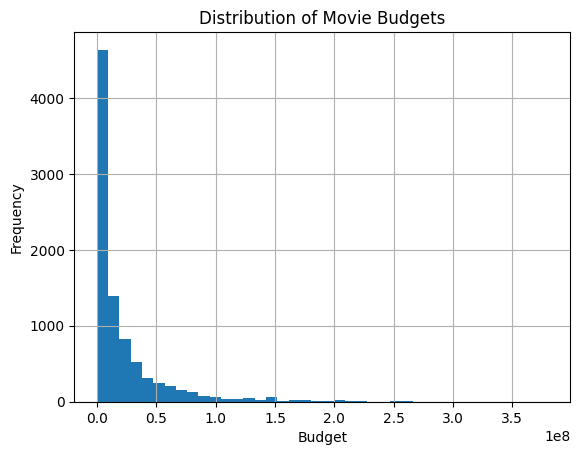

In [43]:
budgets_df['budget'].hist(bins=40)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [47]:
print("ID Type:", ratings_df['movieId'].dtype)
print("Rating Type:", ratings_df['rating'].dtype)

ID Type: int64
Rating Type: float64


In [48]:
avgrating_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avgrating_df.columns = ['id', 'avg_rating']
avgrating_df

,id,avg_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [ ]:
merged_df = budgets_df.merge(avgrating_df, on='id', how='inner')
merged_df = merged_df.dropna().reset_index(drop=True)
merged_df

,id,budget,avg_rating
0,5,4000000.0,3.079565
1,11,11000000.0,3.660591
2,12,94000000.0,2.672179
3,13,55000000.0,3.326442
4,14,15000000.0,3.430807
...,...,...,...
2120,173689,75000.0,1.500000
2121,173865,3120375.0,3.750000
2122,173897,40000000.0,4.000000
2123,174751,25000000.0,2.500000


## Hypothesis Test 1: Is there a correlation between a movie's budget and its average rating?

Pearson correlation coefficient: -0.02035508282807372
P-value: 0.3483122431419324


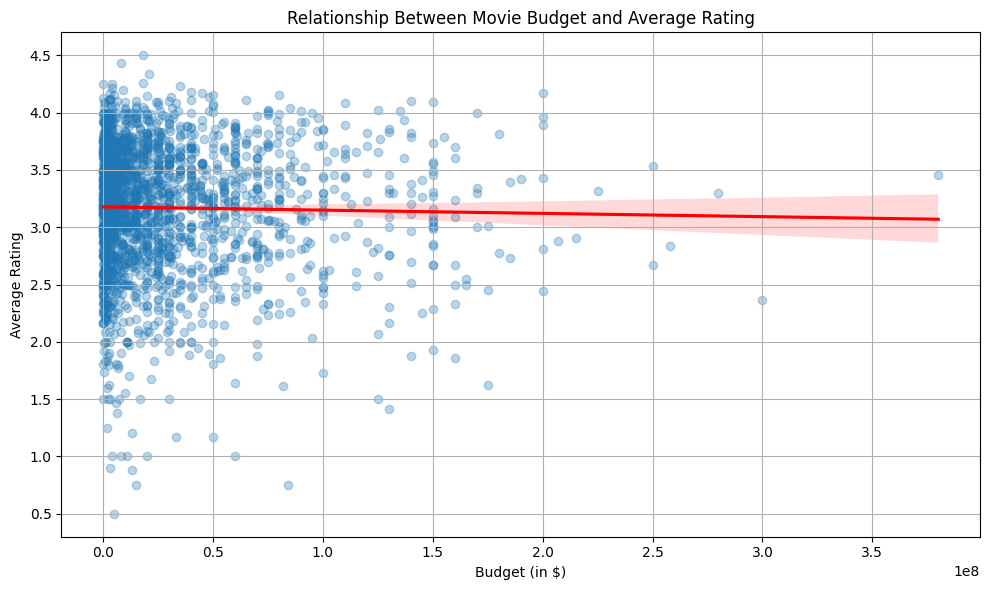

In [55]:
# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(merged_df['budget'], merged_df['avg_rating'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='budget', y='avg_rating', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Relationship Between Movie Budget and Average Rating')
plt.xlabel('Budget (in $)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion: Since the p-value obtained is much higher than .05, little to no correlation between a movie's budget and its average rating. 